<a href="https://colab.research.google.com/github/zurimentaram/Google-Collabs/blob/main/CNN_Klasifikasi_Hoaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7500 - loss: 0.6862 - val_accuracy: 0.2500 - val_loss: 0.6962
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5625 - loss: 0.6887 - val_accuracy: 0.2500 - val_loss: 0.6959
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9375 - loss: 0.6697 - val_accuracy: 0.2500 - val_loss: 0.6955
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9375 - loss: 0.6682 - val_accuracy: 0.2500 - val_loss: 0.6954
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8750 - loss: 0.6726 - val_accuracy: 0.2500 - val_loss: 0.6952
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.6622 - val_accuracy: 0.2500 - val_loss: 0.6951
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8750 - loss: 0.6622 - val_accuracy: 0.5000 - val_loss: 0.694

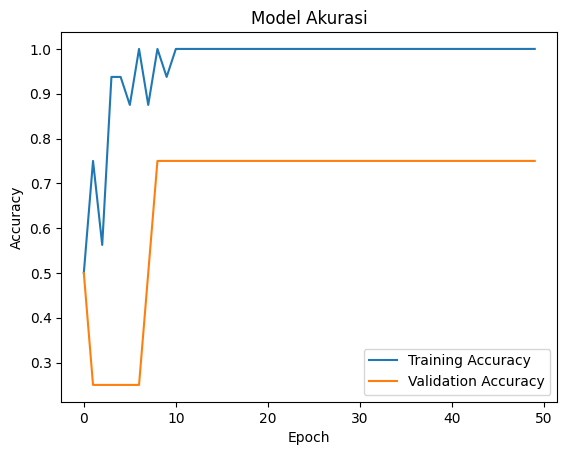

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
'Pemerintah akan tutup semua masjid selama pandemi!' diklasifikasikan sebagai: HOAX
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
'Pemerintah resmi menaikkan anggaran pendidikan sebesar 20 persen' diklasifikasikan sebagai: ASLI


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Persiapan Dataset Minimal (20 sampel)
data = {
    'text': [
        # Berita Asli (label 0)
        "Pemerintah resmi menaikkan anggaran pendidikan sebesar 20 persen",
        "Bank Indonesia pertahankan suku bunga acuan di level 5,75 persen",
        "Indonesia ekspor 500 ton kopi ke Eropa bulan ini",
        "Presiden tinjau langsung proyek infrastruktur di Jawa Barat",
        "Kementerian Kesehatan distribusi vaksin baru ke seluruh provinsi",
        "Pertumbuhan ekonomi kuartal III capai 5,1 persen",
        "Universitas Indonesia masuk 100 besar dunia versi QS",
        "Badan Meteorologi prakirakan musim hujan mundur dua minggu",
        "RI terima penghargaan dunia untuk program lingkungan hidup",
        "Ekspor tekstil tumbuh 15 persen di triwulan kedua",

        # Berita Hoax (label 1)
        "Pemerintah akan tutup semua masjid selama pandemi!",
        "Vaksin COVID-19 mengandung microchip pengendali pikiran",
        "Presiden jual pulau ke negara asing seharga 100 triliun",
        "Air minum kemasan terkontaminasi virus mematikan",
        "Bank sentral akan tarik semua uang kertas pecahan 100 ribu",
        "Makan es krim sebabkan positif COVID-19",
        "Sinyal 5G sebabkan kanker otak dalam 24 jam",
        "Pendaftaran penerima BLT harus bayar 1 juta ke nomor ini",
        "Gempa besar akan hancurkan Jawa minggu depan",
        "Minum air jahe sembuhkan COVID dalam sehari"
    ],
    'label': [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
}

df = pd.DataFrame(data)

# 2. Preprocessing Teks
def preprocess(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c == ' '])
    return text

df['clean_text'] = df['text'].apply(preprocess)

# 3. Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')

# 4. Pembagian Dataset
X = padded
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Arsitektur CNN
model = models.Sequential([
    layers.Embedding(input_dim=1000, output_dim=32, input_length=20),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 6. Pelatihan Model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

# 7. Evaluasi Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nAkurasi Test: {test_acc:.2f}')

# 8. Visualisasi Hasil
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 9. Prediksi Contoh
def predict_hoax(text):
    text = preprocess(text)
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=20)
    prediction = model.predict(pad)
    return "HOAX" if prediction > 0.5 else "ASLI"

# Contoh penggunaan
print(f"'{data['text'][10]}' diklasifikasikan sebagai: {predict_hoax(data['text'][10])}") # Contoh berita hoax
print(f"'{data['text'][0]}' diklasifikasikan sebagai: {predict_hoax(data['text'][0])}")   # Contoh berita asli

In [3]:
print("Jumlah data asli dan hoaks:")
display(df['label'].value_counts())

Jumlah data asli dan hoaks:


,count
label,
0,10
1,10


**Catatan:** Dalam dataset ini, label `0` menunjukkan berita **Asli** dan label `1` menunjukkan berita **Hoaks**.